<a href="https://colab.research.google.com/github/borgesf/scientificPlotsPython_knowvember25/blob/main/2025_11_scientificPlots_Knowvember25_Comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating Scientific Plots in Python

This Knowvember session focus on producing high-quality, informative scientific plots using **Python** and **Matplotlib**.

All examples are fully functional. No coding is required. Some blocks of code are commented for pedagogic purposes.

### Workflow:

0. Setup the environment (libraries, etc.)
1. Start with the basics
2. Titles, axis labels, and units
3. Fonts and text readability
4. Axis limits and focus
5. Figure size and layout
6. Aspect ratio for spatial / geographic data
7. Colour scales and colormaps
8. Colour-blind- and grayscale-friendly maps
9. Consistency across multiple plots
10. Exporting high-quality figures


### References
- https://github.com/borgesf/nicePythonPlots
- https://medium.com/@FilipeBorgesBR/how-to-create-professional-and-readable-scientific-plots-in-python-72f1defed8b3
- https://matplotlib.org/stable/users/explain/colors/colormaps.html
- https://matplotlib.org/cmocean/
- https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels-monthly-means?tab=download#variable
- https://www.color-blindness.com/coblis-color-blindness-simulator/

### Papers

- **Machado, G. M., Oliveira, M. M., & Fernandes, L. A. F. (2009)**  
  *A Physiologically-based Model for Simulation of Color Vision Deficiency.*  
  IEEE Transactions on Visualization and Computer Graphics, 15(6), 1291-1298.  
  [https://doi.org/10.1109/TVCG.2009.113](https://doi.org/10.1109/TVCG.2009.113)

- **Brettel, H., Viénot, F., & Mollon, J. D. (1997)**  
  *Computerized Simulation of Colour Appearance for Dichromats.*  
  Journal of the Optical Society of America A, 14(10), 2647-2655.  
  [https://doi.org/10.1364/JOSAA.14.002647](https://doi.org/10.1364/JOSAA.14.002647)

- **Li, C., Li, Z., Wang, Z., Xu, Y., Luo, M. R., Cui, G., Melgosa, M., Brill, M. H., & Pointer, M. (2017)**  
  *Comprehensive Colour Solutions: CAM16, CAT16, and CAM16-UCS.*  
  Color Research & Application, 42(6), 703-718.  
  [https://doi.org/10.1002/col.22131](https://doi.org/10.1002/col.22131)




# Setup

**How to use this cell:**

1. **First time running:**
   When running this notebook for the firs time in colab, remove the `#` from the line

   ```python
   !pip install numpy matplotlib pandas geopandas xarray requests cmocean[plots]
   ```

   to install all required dependencies. You might be asked to restart your session when doing that. If that is the case, you can comment the line again after restarting.

2. **Subsequent runs:**
   If the libraries are already installed, simply execute the cells with Library Import, Helper Functions, and Data Loading.

3. **Libraries overview:**

   * `NumPy`: numerical data generation and manipulation
   * `Matplotlib`: plotting and visualization
   * `Pandas`: tabular data handling
   * `GeoPandas`: spatial data operations
   * `xarray`: working with labeled multidimensional arrays
   * `Requests`: downloading or accessing remote data
   * `cmocean`: perceptually balanced colormaps for scientific visualization
   * `base64` — encodes binary files (e.g., PNG) as text for inline display
   * `IPython.display` — rich outputs in notebooks (HTML, SVG, iframes)

In [ ]:
# @title Installing libraries (click to expand) - Setup cell 1 of 4 (use when running the notebook for the first time)

# !pip install numpy matplotlib pandas geopandas xarray requests cmocean[plots]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.9/421.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.0/318.0 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 49.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requi

In [ ]:
# @title Importing Libraries (click to expand) - Setup cell 2 of 4

#This magic command ensures plots appear in the notebook
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import xarray as xr
import requests
import cmocean
import base64
from colorspacious import cspace_converter
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display_html, SVG, IFrame

# Set a random seed generator for reproducibility of any random data
np.random.seed(0)

In [ ]:
# @title Helper Functions (click to expand) - Setup cell 3 of 4
# @markdown This cell centralizes all helper utilities used across the notebook.
# @markdown
# @markdown **Functions included (in order of appearance):**
# @markdown - `style_scandinavia_map` — Apply consistent map styling (NOR/SWE/FIN boundaries, axes, title, optional subtitle, colorbar).
# @markdown - `build_grayscale_cmap` — Convert any colormap to a perceptual grayscale (CAM02-UCS J′).
# @markdown - `simulate_partial_color_blind` — Partial red-green deficiency (deuteranomaly; Machado 2009).
# @markdown - `simulate_full_color_blind` — Full green-cone loss (deuteranopia; Brettel 1997).

# -----------------------------
# 1) Map styling helper
# -----------------------------
def style_scandinavia_map(
    ax,
    mappable,
    title_prefix,
    month_name,
    year_str,
    cbar_label,
    *,
    countries=None,                 # list of GeoDataFrames with .boundary
    xlim=(0, 35),
    ylim=(55, 75),
    xtick_step=5,
    ytick_step=5,
    xlabel="Longitude",
    ylabel="Latitude",
    tick_labelsize=12,
    title_fontsize=14,
    label_fontsize=16,
    cbar_ticks=None,                # e.g., np.arange(-15, 15.1, 5) or [] to show no ticks
    city=None,                      # tuple (lon, lat) to mark a point
    city_label=None,                # e.g., "Bergen"
    legend=False,                   # show legend if city_label provided
    subtitle=None                   # optional second line under the main title
):
    """
    Apply consistent map styling and annotations to an axes, given a contourf/imshow mappable.
    """
    # Country boundaries
    if countries is None:
        # assumes globals Norway, Sweden, Finland exist
        _countries = [Norway, Sweden, Finland]
    else:
        _countries = countries

    for gdf in _countries:
        gdf.boundary.plot(ax=ax, edgecolor="black", linewidth=2, zorder=10)

    # Axes labels, limits, ticks
    ax.set_xlabel(xlabel, fontsize=label_fontsize)
    ax.set_ylabel(ylabel, fontsize=label_fontsize)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.set_xticks(np.arange(xlim[0], xlim[1] + 0.1, xtick_step))
    ax.set_yticks(np.arange(ylim[0], ylim[1] + 0.1, ytick_step))
    ax.tick_params(labelsize=tick_labelsize)

    # Title (single line by default; add second line if subtitle is provided)
    title_suffix = f"{month_name} {year_str}".strip()
    title_text = f"{title_prefix} - {title_suffix}"
    if subtitle:
        title_text = f"{title_text}\n({subtitle})"
    ax.set_title(title_text, fontsize=title_fontsize)

    # Optional city marker
    if city is not None:
        ax.plot(city[0], city[1], 'ro', markersize=8, zorder=15,
                label=(city_label if city_label else None))
        if legend and city_label:
            ax.legend(edgecolor='black', loc='upper left', fontsize=tick_labelsize)

    # Colorbar
    cbar = plt.colorbar(mappable, ax=ax)
    cbar.set_label(cbar_label, fontsize=label_fontsize)
    if cbar_ticks is not None:
        cbar.set_ticks(cbar_ticks)   # pass [] to show no colorbar ticks
    cbar.ax.tick_params(labelsize=tick_labelsize)

    return ax

# -----------------------------
# 2) Colormap → perceptual grayscale (CAM02-UCS J′)
# -----------------------------
def build_grayscale_cmap(cmap_in, n=256, name_suffix="_gray"):
    """
    Convert any colormap (name or object) into a grayscale colormap by
    sampling in sRGB, transforming to CAM02-UCS, extracting J′, and
    mapping J′ → (J′, J′, J′).
    """
    # Resolve input to a colormap object
    cmap_obj = mpl.colormaps[cmap_in] if isinstance(cmap_in, str) else cmap_in

    # Local import to avoid hard dependency at cell import time
    from colorspacious import cspace_converter

    # Sample uniformly in sRGB [0..1]
    x = np.linspace(0.0, 1.0, n)
    rgb = cmap_obj(x)[:, :3]  # (n, 3) in sRGB

    # Convert to CAM02-UCS and take J′ (index 0)
    to_cam02ucs = cspace_converter("sRGB1", "CAM02-UCS")
    cam = to_cam02ucs(rgb[np.newaxis, :, :])  # (1, n, 3)
    Jp = cam[0, :, 0]

    # Normalize J′ to [0,1] and build gray ramp
    Jp_norm = (Jp - Jp.min()) / (Jp.max() - Jp.min() + 1e-12)
    gray_triplets = [(v, v, v) for v in Jp_norm]

    # Name for the new grayscale colormap
    base_name = cmap_in if isinstance(cmap_in, str) else getattr(cmap_obj, "name", "cmap")
    gray_name = f"{base_name}{name_suffix}"

    return LinearSegmentedColormap.from_list(gray_name, gray_triplets, N=n)

# -----------------------------
# 3) Partial red-green deficiency (Machado 2009)
# -----------------------------
# Matrix from Machado et al. (2009) for deuteranopia
M_deuteranopia = np.array([
    [0.367322, 0.860646, -0.227968],
    [0.280085, 0.672501,  0.047413],
    [-0.011820, 0.042940,  0.968881]
])

def simulate_partial_color_blind(rgb_array, severity=1.0):
    """
    Simulate partial red-green color deficiency (deuteranomaly).
    Based on Machado et al. 2009.
    """
    # sRGB → linear
    rgb_lin = np.where(
        rgb_array <= 0.04045,
        rgb_array / 12.92,
        ((rgb_array + 0.055) / 1.055) ** 2.4
    )

    # Interpolate transformation by severity
    T = severity * M_deuteranopia + (1 - severity) * np.eye(3)

    # Apply and guard against negatives before gamma
    transformed = np.dot(rgb_lin, T.T)
    transformed = np.clip(transformed, 0.0, None)

    # linear → sRGB
    rgb_sim = np.where(
        transformed <= 0.0031308,
        12.92 * transformed,
        1.055 * (transformed ** (1 / 2.4)) - 0.055
    )

    return np.clip(rgb_sim, 0, 1)

# -----------------------------
# 4) Full green-cone loss (Brettel 1997)
# -----------------------------
def simulate_full_color_blind(rgb_array):
    """
    Simulate full green-cone loss (deuteranopia).
    Based on Brettel et al. 1997.
    """
    def srgb_to_linear(rgb):
        return np.where(
            rgb <= 0.04045,
            rgb / 12.92,
            ((rgb + 0.055) / 1.055) ** 2.4
        )

    linear_rgb = srgb_to_linear(rgb_array)

    rgb_to_lms = np.array([
        [17.8824,   43.5161,   4.11935],
        [ 3.45565,  27.1554,   3.86714],
        [ 0.0299566, 0.184309, 1.46709]
    ])

    lms = np.dot(linear_rgb, rgb_to_lms.T)

    plane1 = np.array([
        [1.0,       0.0,     0.0],
        [0.494207,  0.0,     1.24827],
        [0.0,       0.0,     1.0]
    ])

    plane2 = np.array([
        [1.0,       0.0,     0.0],
        [0.466174,  0.0,     1.44742],
        [0.0,       0.0,     1.0]
    ])

    lms_sim = np.zeros_like(lms)
    mask = lms[:, 0] > lms[:, 1] + lms[:, 2]

    lms_sim[mask]  = np.dot(lms[mask],  plane1.T)
    lms_sim[~mask] = np.dot(lms[~mask], plane2.T)

    lms_to_rgb = np.linalg.inv(rgb_to_lms)
    linear_rgb_sim = np.dot(lms_sim, lms_to_rgb.T)

    def linear_to_srgb(rgb):
        return np.where(
            rgb <= 0.0031308,
            12.92 * rgb,
            1.055 * (rgb ** (1 / 2.4)) - 0.055
        )

    return np.clip(linear_to_srgb(linear_rgb_sim), 0, 1)


In [ ]:
# @title Dataset Loading and Preprocessing (click to expand) - Setup cell 4 of 4
# @markdown Utility cell to automatically download, open, and prepare all datasets used in the notebook.
# @markdown - Downloads country boundaries (Norway, Sweden, Finland) from public GeoJSON files
# @markdown - Downloads temperature and rainfall datasets (NetCDF)
# @markdown - Converts temperature to Celsius and rainfall to millimeters
# @markdown - Creates grid arrays (LON, LAT) for later plotting

# -----------------------------
# 1) Read country boundaries (GeoJSON via public URLs, EPSG:4326)
# -----------------------------
url_nor = "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_NOR_0.json"
url_swe = "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_SWE_0.json"
url_fin = "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_FIN_0.json"

country = gpd.read_file(url_nor)

Norway  = gpd.read_file(url_nor).to_crs(4326)
Sweden  = gpd.read_file(url_swe).to_crs(4326)
Finland = gpd.read_file(url_fin).to_crs(4326)

# Determine common spatial extent
merged = gpd.GeoDataFrame(pd.concat([Norway, Sweden, Finland], ignore_index=True), crs=4326)

# -----------------------------
# 2) Download NetCDF datasets (temperature and rainfall)
# -----------------------------
T1_url = "https://github.com/borgesf/scientificPlotsPython_knowvember25/raw/7980ea410d604ee850be7a6660db44a1b81875d9/NorwayTemp.nc"
R1_url = "https://github.com/borgesf/scientificPlotsPython_knowvember25/raw/7980ea410d604ee850be7a6660db44a1b81875d9/NorwayRain.nc"
R2_url = "https://github.com/borgesf/scientificPlotsPython_knowvember25/raw/7980ea410d604ee850be7a6660db44a1b81875d9/NorwayRain2000.nc"

# Temperature file 1
r = requests.get(T1_url)
with open("NorwayTemp.nc", "wb") as f:
    f.write(r.content)

# Rainfall file 1
r = requests.get(R1_url)
with open("NorwayRain.nc", "wb") as f:
    f.write(r.content)

# Rainfall file 2
r = requests.get(R2_url)
with open("NorwayRain2000.nc", "wb") as f:
    f.write(r.content)


# -----------------------------
# 3) Open datasets with xarray
# -----------------------------
dataset_temperature = xr.open_dataset("NorwayTemp.nc")
dataset_rain = xr.open_dataset("NorwayRain.nc")
dataset_rain_2 = xr.open_dataset("NorwayRain2000.nc")

# -----------------------------
# 4) Extract variables and metadata
# -----------------------------
# Temperature (convert Kelvin → Celsius)
temp_var = list(dataset_temperature.data_vars)[0]
temperature_data = dataset_temperature[temp_var].squeeze()
temperature_array = temperature_data.values - 273.15

# Rainfall (convert meters → millimeters)
rain_var = list(dataset_rain.data_vars)[0]
rain_data = dataset_rain[rain_var].squeeze()
rain_array = 1000 * rain_data.values

rain_data_2= dataset_rain_2[rain_var].squeeze()
rain_array_2 = 1000 * rain_data_2.values

# -----------------------------
# 5) Extract coordinates and create meshgrid
# -----------------------------
longitudes = temperature_data.longitude.values
latitudes  = temperature_data.latitude.values
LON, LAT   = np.meshgrid(longitudes, latitudes)

# -----------------------------
# 6) Extract timestamp for labeling
# -----------------------------
timestamp  = pd.to_datetime(dataset_temperature["valid_time"].values[0])
month_name = timestamp.strftime("%B")
year_str   = timestamp.strftime("%Y")

timestamp_2  = pd.to_datetime(dataset_rain_2["valid_time"].values[0])
month_name_2 = timestamp_2.strftime("%B")
year_str_2   = timestamp_2.strftime("%Y")


# Step 1 — Start with the basics

### Goals
- Generate simple data
- Create a default Matplotlib plot without any styling

In [ ]:
# Create an array of x values from 0 to 10 with an increment of 0.1
x = np.arange(0, 10.1, 0.1)

# Compute the sine and cosine values for each x
y1 = np.sin(x)
y2 = np.cos(x)

# Create a new figure
plt.figure()

# Plot sine and cosine curves
plt.plot(x, y1)
plt.plot(x, y2)

# Show the plot
plt.show()


### Discussion
- Is this plot "correct"?
- Look at what is missing for communication. If you show this to someone, will they understand what you are trying to show?

# Step 2 — Titles, axis labels, and units

Goals:
- Add descriptive axis labels and a title.
- Include units (e.g. `Temperature (°C)` instead of just `Temperature`).


In [ ]:
# Generate x values from 0 to 10 with a step of 0.1
x = np.arange(0, 10.1, 0.1)

# Compute sine and cosine values for each x
y1 = np.sin(x)
y2 = np.cos(x)

# Create a new figure for the plot
plt.figure()

# Plot the sine and cosine curves. Add labels for the legend
plt.plot(x, y1)
plt.plot(x, y2)

# Set the title and axis labels for clarity
plt.title('Sine and Cosine Waves')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')

# Place the legend in the lower left corner
plt.legend(loc='lower left')

# Display the plot
plt.show()



NameError: name 'np' is not defined

### Discussion
- A plot should be understandable by someone who was **not** involved in generating it. The viewer should immediately know what the data represents.
- Titles are helpful in slides and talks. In journal figures, sometimes you skip the title and rely on the caption.
- If there are multiple curves, the legend must make the distinction obvious.


# Step 3 — Fonts and text readability

Goals
- Choose a consistent font family (typically a sans-serif font like Arial or DejaVu Sans).
- Control font sizes for title, axis labels, and tick labels.
- Tip: apply style globally using `plt.rcParams` so every figure in the notebook follows the same standard (this is commented in the code below to illustrate the differences between plots).

Typical font sizes:
- Title: ~14–18 pt
- Axis labels: ~12–14 pt
- Tick labels: ~10–12 pt


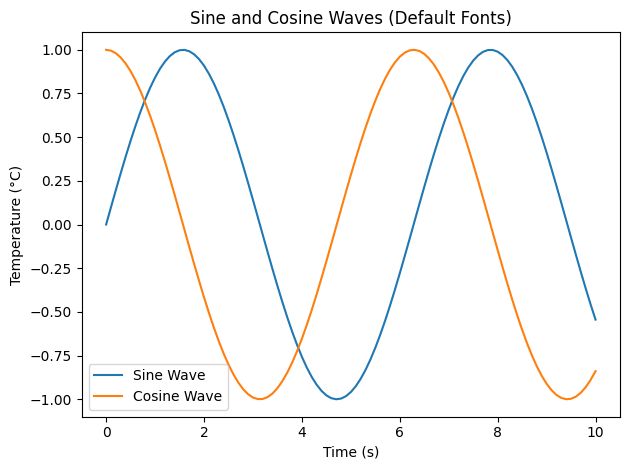

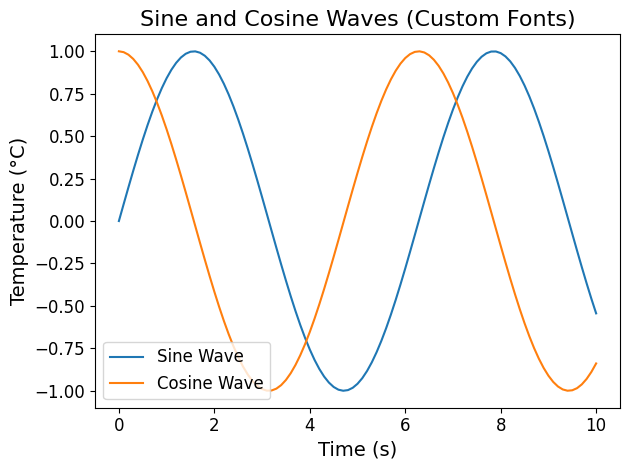

In [ ]:
# Tip: Set global font parameters

# plt.rcParams.update({'font.family': 'DejaVu Sans', 'font.size': 14})  # set global font style for all plots
# plt.rcdefaults()  # reset to Matplotlib default settings

x = np.arange(0, 10.1, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

# -----------------------------
# Figure 1: Default Font Settings
# -----------------------------

fig1, ax1 = plt.subplots()

ax1.plot(x, y1, label='Sine Wave')
ax1.plot(x, y2, label='Cosine Wave')

ax1.set_title('Sine and Cosine Waves (Default Fonts)')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Temperature (°C)')
ax1.legend(loc='lower left')

fig1.tight_layout()  # Automatically optimize spacing between plot elements. Nice for comparing plots
plt.show()

# -----------------------------
# Figure 2: Customized Font Settings
# -----------------------------

fontFamily_sans = 'DejaVu Sans'

fig2, ax2 = plt.subplots()

ax2.plot(x, y1, label='Sine Wave')
ax2.plot(x, y2, label='Cosine Wave')

ax2.set_title('Sine and Cosine Waves (Custom Fonts)', fontsize=16, family=fontFamily_sans)
ax2.set_xlabel('Time (s)', fontsize=14, family=fontFamily_sans)
ax2.set_ylabel('Temperature (°C)', fontsize=14, family=fontFamily_sans)

ax2.legend(loc='lower left', fontsize=12)
ax2.tick_params(labelsize=12)  # control tick font size

fig2.tight_layout()  # Automatically optimize spacing between plot elements
plt.show()

# -----------------------------
# Figure 3: Customized Font Settings (Serif) - uncomment to try
# -----------------------------

# fontFamily_serif = 'DejaVu Serif' # try DejaVu Sans Mono

# fig3, ax3 = plt.subplots()

# ax3.plot(x, y1, label='Sine Wave')
# ax3.plot(x, y2, label='Cosine Wave')

# ax3.set_title('Sine and Cosine Waves (Serif Fonts)', fontsize=16, family=fontFamily_serif)
# ax3.set_xlabel('Time (s)', fontsize=14, family=fontFamily_serif)
# ax3.set_ylabel('Temperature (°C)', fontsize=14, family=fontFamily_serif)

# ax3.legend(loc='lower left', prop={'family': fontFamily_serif, 'size': 12})
# ax3.tick_params(labelsize=12)  # control tick font size

# fig3.tight_layout()  # Automatically optimize spacing between plot elements
# plt.show()



Discussion:
- Try being consistent with font settings for all plots in a document or slide deck.
- Export the figure to the final format you are going to use to see how it looks (more on that later)


# Step 4 — Axis limits and focus

Goals:
- Focus the reader's attention on what actually matters in the data.
- Manually adjust x- and y-limits (for example, zoom into a specific time window or depth range).
- Use symmetric y-limits when showing positive and negative deviations around zero.


In [ ]:
# Generate an array of x values from 0 to 10 with a step of 0.1
x = np.arange(0, 10.1, 0.1)

# Compute the sine and cosine values for each x
y1 = np.sin(x)
y2 = np.cos(0.7*x + 0.2)

# Natural “distorter”: a narrow resonance peak (Lorentzian) centered at x0
x0, gamma, A = 6.0, 0.15, 4.0
lorentz = A / (1.0 + ((x - x0)/gamma)**2)

# Add reproducible random noise
noise_amplitude = 0.1
y1_noisy = x/2 + y1 + noise_amplitude * np.random.randn(len(y1))
y2_noisy = lorentz + 2*y2 + noise_amplitude * np.random.randn(len(y2))

# -----------------------------
# Figure 1: Initial plot (auto-scaled axes)
# -----------------------------
fig1, ax1 = plt.subplots()  # Create the first figure and axis

ax1.plot(x, y1_noisy, label='Sensor 1')
ax1.plot(x, y2_noisy, label='Sensor 2')

ax1.set_title('Field Data (Initial plot)', fontsize=16)
ax1.set_xlabel('Time (s)', fontsize=14)
ax1.set_ylabel('Temperature (°C)', fontsize=14)

ax1.legend(loc='lower left', fontsize=12)
ax1.tick_params(labelsize=12)  # Control tick label size for this plot

fig1.tight_layout()

# -----------------------------
# Figure 2: Improved plot (manual axis limits) - Uncomment to try
# -----------------------------

# fig2, ax2 = plt.subplots()  # Create the second figure and axis

# # Plot the noisy signals with consistent styling
# ax2.plot(x, y1_noisy, '-', linewidth=2, label='Sensor 1')
# ax2.plot(x, y2_noisy, '-', linewidth=2, label='Sensor 2')

# # Title and axis labels
# ax2.set_title('Field Data (Improved plot)', fontsize=16)
# ax2.set_xlabel('Time (s)', fontsize=14)
# ax2.set_ylabel('Temperature (°C)', fontsize=14)
# ax2.tick_params(labelsize=12)

# # Manually defined axis limits for better comparison and visual balance. Uncomment and add your values.

# # ax2.set_xlim()
# # ax2.set_ylim()
# # ax2.set_yticks(np.arange())

# # Legend
# ax2.legend(loc='lower left', fontsize=12)

# fig2.tight_layout()

# # Display
# plt.show()


In [ ]:
# Company quarterly adjusted net income (in billion USD) for all four quarters of 2024
quarters = ['Q1 2024', 'Q2 2024', 'Q3 2024', 'Q4 2024']
net_income = [2.84, 2.42, 2.19, 2.29]  # USD billions

# -----------------------------
# Figure 1: Initial plot
# -----------------------------
fig1, ax1 = plt.subplots(figsize=(7, 5))  # Create the first figure and axis

# Bars with neutral styling
bars1 = ax1.bar(
    quarters,
    net_income,
    color=['gray', 'gray', 'gray', 'gray'],
    edgecolor='black',
    linewidth=1.5,
    width=0.4
)

# Title and axis label
ax1.set_title('Company Quarterly Results', fontsize=16)
ax1.set_ylabel('Adjusted Net Income (Billion USD)', fontsize=14)

# Manually set y-axis to start above zero (exaggerates visual differences)
ax1.set_ylim([2.1, 2.9])
ax1.set_yticks(np.arange(2.1, 2.91, 0.2))
ax1.tick_params(labelsize=12)

# Grid for readability
ax1.grid(axis='y', alpha=0.5, linewidth=0.5)

fig1.tight_layout()

# Display
plt.show()

# -----------------------------
# Figure 2: Improved (“honest”) plot
# -----------------------------

# fig2, ax2 = plt.subplots(figsize=(7, 5))  # Create the second figure and axis

# # Bars with consistent styling
# bars2 = ax2.bar(
#     quarters,
#     net_income,
#     color=['blue', 'blue', 'blue', 'blue'],
#     edgecolor='black',
#     linewidth=1.5,
#     width=0.4
# )

# # Title and axis label
# ax2.set_title('Company Quarterly Results ("Honest" plot)', fontsize=16)
# ax2.set_ylabel('Adjusted Net Income (Billion USD)', fontsize=14)
# ax2.tick_params(labelsize=12)

# # Axis limits and ticks to show true proportions
# # ax2.set_ylim()
# # ax2.set_yticks(np.arange())

# # Grid and baseline
# ax2.grid(axis='y', alpha=0.5, linewidth=0.5)

# fig2.tight_layout()

# # Display
# plt.show()


Discussion:
- Autoscaling can hide important features or exaggerate noise.
- The limits you choose influence interpretation.


# Step 5 — Figure size and layout

Goals:
- Explicitly control figure size using `figsize=(width, height)`.
- Add grid lines to improve data readability.
- Actively use different line styles
- Add a light warm background color


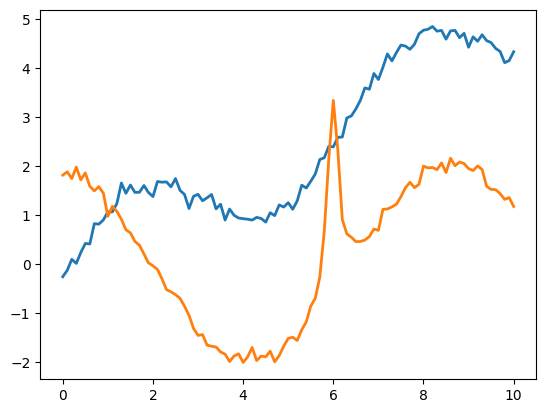

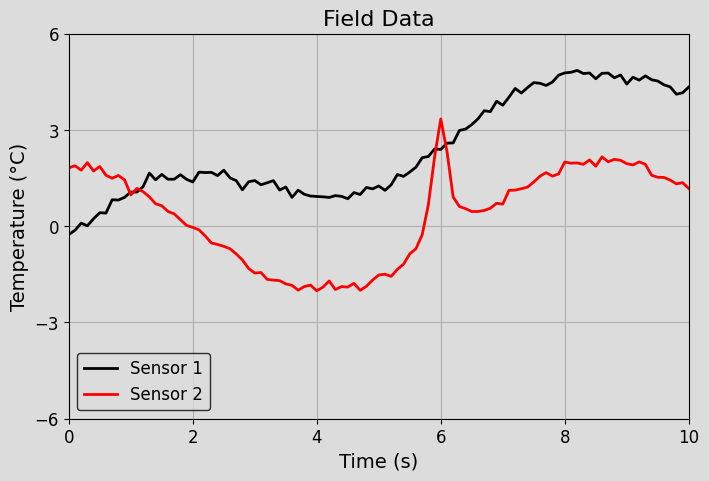

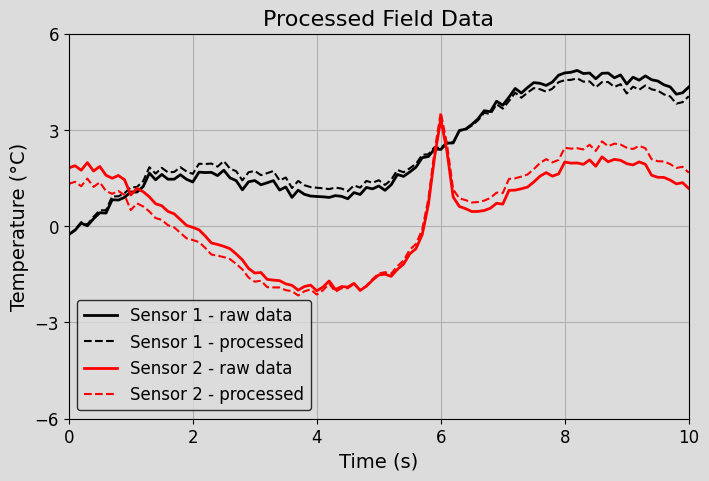

In [ ]:
# Generate an array of x values from 0 to 10 with a step of 0.1
x = np.arange(0, 10.1, 0.1)

# Compute the sine and cosine values for each x
y1 = np.sin(x)
y2 = np.cos(0.7*x + 0.2)

# Natural “distorter”: a narrow resonance peak (Lorentzian) centered at x0
x0, gamma, A = 6.0, 0.15, 4.0
lorentz = A / (1.0 + ((x - x0)/gamma)**2)

# Add reproducible random noise
noise_amplitude = 0.1
y1_noisy = x + 0.5 + y1 + noise_amplitude * np.random.randn(len(y1))
y2_noisy = x + lorentz + 2*y2 + noise_amplitude * np.random.randn(len(y2))

# -----------------------------
# Figure 1 (same as final product of previous code block)
# -----------------------------
fig1, ax1 = plt.subplots()

ax1.plot(x, y1_noisy, '-', linewidth=2, label='Oil')
ax1.plot(x, y2_noisy, '-', linewidth=2, label='Gas')

ax1.set_title('Well production', fontsize=16)
ax1.set_xlabel('Time (days)', fontsize=14)
ax1.set_ylabel('Production rate (kboepd)', fontsize=14)

# Manual axis limits
ax1.set_xlim([x[0], x[-1]])
#ax1.set_ylim([-6, 6])
#ax1.set_yticks(np.arange(-6, 6.1, 3))
ax1.tick_params(labelsize=12)

ax1.legend(loc='upper left', fontsize=12)

plt.show()

# -----------------------------
# Figure 2: Enhanced (same data and limits; grid + proper size) - uncomment to try
# -----------------------------

# fig2, ax2 = plt.subplots(figsize=(8, 5))

# bg_color = 'gainsboro'  # try 'slategray' or "white"

# # Figure background
# fig2.patch.set_facecolor(bg_color)

# # Axes background
# ax2.set_facecolor(bg_color)

# ax2.plot(x, y1_noisy, '-', linewidth=2, label='Oil')
# ax2.plot(x, y2_noisy, '-', linewidth=2, label='Gas')

# ax2.set_title('Well production — Refined (same limits, clearer layout)', fontsize=16)
# ax2.set_xlabel('Time (days)', fontsize=14)
# ax2.set_ylabel('Production rate (kboepd)', fontsize=14)

# # Axis limits
# ax2.set_xlim([x[0], x[-1]])
# #ax2.set_ylim()
# #ax2.set_yticks(np.arange())
# ax2.tick_params(labelsize=12)

# # Grid refinement
# ax2.grid(True)

# ax2.legend(loc='upper left', fontsize=12, edgecolor='k', facecolor=bg_color)

# plt.show()

# -----------------------------
# Figure 3: Linestyles + additional information (±) - uncomment to try
# -----------------------------

# fig3, ax3 = plt.subplots(figsize=(8, 5))

# # Figure background
# fig3.patch.set_facecolor(bg_color)

# # Axes background
# ax3.set_facecolor(bg_color)

# ax3.plot(x, y1_noisy, '-', color = 'k', linewidth=2, label='Oil')
# ax3.plot(x, y2_noisy, '-', color = 'r', linewidth=2, label='Gas')
# ax3.plot(x, (0.5 + 0.5*np.random.uniform(-1,1,size=x.shape))*y2_noisy, '-', color = 'r', linewidth=2, label='Gas Export')

# ax3.set_title('Well production — Refined (same limits, clearer layout)', fontsize=16)
# ax3.set_xlabel('Time (days)', fontsize=14)
# ax3.set_ylabel('Production rate (kboepd)', fontsize=14)

# # Axis limits
# ax3.set_xlim([x[0], x[-1]])
# ax3.set_ylim(0, 12)
# ax3.tick_params(labelsize=12)

# # Grid refinement
# ax3.grid(True)

# ax3.legend(loc='upper left', fontsize=12, edgecolor='k', facecolor=bg_color)

# plt.show()


Discussion:
- Grid lines improve readability
- Line styles can help represent different types of data (e.g. uncertainty bounds), specially in grayscale/print contexts


# Step 6 — Aspect ratio for spatial / geographic data

Goal:
- Preserve geometric accuracy in spatial plots.

In [ ]:
# Generate data for a circle
theta = np.linspace(0, 2 * np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)

# Create a new figure for the plot
plt.figure()

# Plot the circle with a thicker line
plt.plot(x, y, 'k', linewidth=2, label='Circle')

# Set the plot title and axis labels with larger fonts for better readability
plt.title('Circle', fontsize=16)
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)

# Get current Axes and lock equal aspect, then set limits
ax = plt.gca()
#ax.set_aspect('equal')
plt.xlim([-2, 2])
plt.ylim([-2, 2])

# Set y-ticks from -2 to 2
plt.yticks(np.arange(-2, 3, 1))

# Add grid, box, and legend
plt.grid(True)
ax = plt.gca()
plt.legend(loc='lower left', fontsize=12)

# Show the figure
plt.show()

In [ ]:


# -----------------------------
# Figure 1: Default aspect ratio (auto-scaled)
# -----------------------------
fig, ax = plt.subplots(figsize=(6, 6))
country.plot(ax=ax, edgecolor='black', facecolor='lightgray', aspect='auto')
ax.set_title("Country outline (default aspect)")
plt.show()

# -----------------------------
# Figure 2: Equal aspect ratio (1:1 scale)
# -----------------------------
# fig, ax = plt.subplots(figsize=(6, 6))
# country.plot(ax=ax, edgecolor='black', facecolor='lightgray')
# ax.set_title("Country outline (equal aspect)")
# ax.set_aspect('equal')  # Force 1:1 visual scale between X and Y axes
# plt.show()


In [ ]:
# -----------------------------
# Reproject the geometry to a UTM coordinate system (meters)
# -----------------------------
country_utm = country.to_crs(epsg=32633)  # Convert from geographic (degrees) to projected (UTM Zone 33N)

# -----------------------------
# Figure 1: Default aspect ratio (auto-scaled)
# -----------------------------
fig, ax = plt.subplots()
country_utm.plot(ax=ax, edgecolor='black', facecolor='lightgray', aspect='auto')
ax.set_title("Country outline (default aspect)")
plt.show()

# -----------------------------
# Figure 2: Equal aspect ratio (1:1 scale in projected units)
# -----------------------------
fig, ax = plt.subplots()
country_utm.plot(ax=ax, edgecolor='black', facecolor='lightgray')
ax.set_title("Country outline (equal aspect)")
ax.set_aspect('equal')  # Force 1:1 visual scale between X and Y (now in meters)
plt.show()

Discussion:
- In any spatial analysis, distance ratios must be accurate.
- If you are showing geometry, use equal aspect ratio unless you have a very good reason not to.


# Step 7 — Colour scales and colormaps

Goal:
- Use colour to represent data in a clear and accurate way.


In [ ]:
# ---------------------
# Plot Temperature Map
# ---------------------
fig1, ax1 = plt.subplots(figsize=(8, 6))

# Try cmap = "jet", "bwr", and cmocean.cm.balance
# try levels = np.linspace(-15, 15, 1000)
contour = ax1.contourf(
    LON, LAT, temperature_array,
    levels=1000,
)

# Apply consistent map styling
style_scandinavia_map(
    ax=ax1,
    mappable=contour,
    title_prefix="Temperature Map",
    month_name=month_name,
    year_str=year_str,
    cbar_label="Temperature (°C)",
    #cbar_ticks=np.arange(-15, 15.1, 5) # Uncomment to have regular ticks
)

fig1.tight_layout()  # Automatically optimize spacing between plot elements
plt.show()


In [ ]:
# -----------------------------
# Comparing Temperature Maps
# -----------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# LEFT plot: default colormap
contour_left = ax1.contourf(
    LON, LAT, temperature_array,
    levels=1000
)
style_scandinavia_map(
    ax1, contour_left,
    title_prefix="Temperature Map",
    month_name=month_name, year_str=year_str,
    cbar_label="Temperature (°C)"
)

# RIGHT plot: cmocean 'balance', symmetric levels
contour_right = ax2.contourf(
    LON, LAT, temperature_array,
    levels=np.linspace(-15, 15.1, 1000),
    cmap=cmocean.cm.balance
)
style_scandinavia_map(
    ax2, contour_right,
    title_prefix="Temperature Map",
    month_name=month_name, year_str=year_str,
    cbar_label="Temperature (°C)",
    cbar_ticks=np.arange(-15, 15.1, 5)
)

fig.tight_layout()
plt.show()


In [ ]:
# ------------------------
# Plot Precipitation Map
# ------------------------
fig1, ax1 = plt.subplots(figsize=(8, 6))

# Try cmap = "rainbow", "Blues", or cmocean.cm.rain
# Try levels = np.linspace(0, 12, 1000)
contour = ax1.contourf(
    LON, LAT, rain_array,
    levels=1000
)

# Apply consistent map styling
style_scandinavia_map(
    ax=ax1,
    mappable=contour,
    title_prefix="Precipitation Map",
    month_name=month_name,
    year_str=year_str,
    cbar_label="Total Precipitation (mm)",
    #cbar_ticks=np.arange(0, 12.1, 2) # Uncomment to have regular ticks
)

fig1.tight_layout()  # Automatically optimize spacing between plot elements
plt.show()


In [ ]:
# -----------------------------
# Comparing Precipitation Maps
# -----------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ----------------------------------------
# LEFT: Standard colormap
# ----------------------------------------
contour_left = ax1.contourf(
    LON, LAT, rain_array,
    levels=1000
)

style_scandinavia_map(
    ax=ax1,
    mappable=contour_left,
    title_prefix="Precipitation Map",
    month_name=month_name,
    year_str=year_str,
    cbar_label="Total Precipitation (mm)",
)

# ----------------------------------------
# RIGHT: Scientific colormap (cmocean 'rain')
# ----------------------------------------
contour_right = ax2.contourf(
    LON, LAT, rain_array,
    levels=np.linspace(0, 12.1, 1000),
    cmap=cmocean.cm.rain
)

style_scandinavia_map(
    ax=ax2,
    mappable=contour_right,
    title_prefix="Precipitation Map",
    month_name=month_name,
    year_str=year_str,
    cbar_label="Total Precipitation (mm)",
    cbar_ticks=np.arange(0, 12.1, 2),
    city=(5 + 19/60 + 48/3600, 60 + 23/60 + 22/3600),
    city_label="Bergen",
    legend=True
)

fig.tight_layout()
plt.show()


Discussion:
- Colour is not decoration. It is data.
- The colour scale must be readable and appropriate/justifiable.


# Step 8 — Colour-blind- and grayscale-friendly maps

Goal:
- Ensure that visualizations remain clear and interpretable in grayscale and for viewers with CVD (colour vision deficiencies).


In [ ]:
# -----------------------------
# Colourmap → Grayscale (CAM02-UCS J′-mapped) — using helper
# -----------------------------
# Try cmap = "jet", "inferno", "bwr", or cmocean.cm.balance

cmap_in = "jet"  # original colormap to evaluate
cmap_obj = mpl.colormaps[cmap_in] if isinstance(cmap_in, str) else cmap_in
cmap_gray = build_grayscale_cmap(cmap_in, n=256)  # uses helper defined earlier

# -----------------------------
# Side-by-side: original vs grayscale
# -----------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# --- LEFT: Original colour version ---
contour1 = ax1.contourf(
    LON, LAT, temperature_array,
    levels=np.linspace(-15, 15, 1000),
    cmap=cmap_obj
)
style_scandinavia_map(
    ax=ax1,
    mappable=contour1,
    title_prefix="Temperature Map",
    month_name=month_name,
    year_str=year_str,
    cbar_label="Temperature (°C)",
    cbar_ticks=np.arange(-15, 15.1, 5)
)

# --- RIGHT: Grayscale (J′-mapped) version ---
contour2 = ax2.contourf(
    LON, LAT, temperature_array,
    levels=np.linspace(-15, 15, 1000),
    cmap=cmap_gray
)
style_scandinavia_map(
    ax=ax2,
    mappable=contour2,
    title_prefix="Temperature Map",
    month_name=month_name,
    year_str=year_str,
    cbar_label="Temperature (°C)",
    cbar_ticks=np.arange(-15, 15.1, 5)
)

fig.tight_layout()
plt.show()


## Cmocean overview
This section displays a list of all cmocean colormaps.

In [ ]:
# -----------------------------
# Display all available cmocean colormaps
# -----------------------------

# List of selected cmocean colormap names
cmap_names = [
    'thermal', 'haline', 'solar', 'ice', 'gray', 'oxy', 'deep',
    'dense', 'algae', 'matter', 'turbid', 'speed', 'amp', 'tempo',
    'rain', 'phase', 'topo', 'balance', 'delta', 'curl', 'diff', 'tarn'
]

# -----------------------------
# Create gradient for color visualization
# -----------------------------
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# -----------------------------
# Figure: Overview of all colormaps
# -----------------------------
fig, axes = plt.subplots(len(cmap_names), 1, figsize=(10, len(cmap_names) * 0.4))

# Loop through each colormap and display the gradient
for ax, name in zip(axes, cmap_names):
    cmap = getattr(cmocean.cm, name)
    ax.imshow(gradient, aspect='auto', cmap=cmap)
    ax.set_axis_off()
    ax.text(
        -0.01, 0.5, name,
        va='center', ha='right',
        fontsize=11, transform=ax.transAxes
    )

# Adjust layout for compact display
plt.subplots_adjust(left=0.15, right=0.99, top=0.99, bottom=0.01, hspace=0.05)

# Display
plt.show()


In [ ]:
# -----------------------------
# Colour Vision Deficiency — Precipitation Maps (using helpers)
# -----------------------------
# Base colormap to transform
cmap_in = "jet"
cmap_obj = mpl.colormaps[cmap_in] if isinstance(cmap_in, str) else cmap_in

# Sample the base colormap and build derived colormaps
x = np.linspace(0.0, 1.0, 256)
rgb = cmap_obj(x)[:, :3]

# Partial colour blindness (severity ~0.75)
rgb_partial = simulate_partial_color_blind(rgb, severity=0.75)
cmap_partial = LinearSegmentedColormap.from_list("partial_0.75", rgb_partial, N=256)

# Full colour blindness (deuteranopia)
rgb_full = simulate_full_color_blind(rgb)
cmap_full = LinearSegmentedColormap.from_list("full_deuteranopia", rgb_full, N=256)

# -----------------------------
# Figure: Normal vs Partial vs Full
# -----------------------------
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# --- Normal Vision ---
contour1 = ax1.contourf(LON, LAT, rain_array, levels=np.linspace(0, 12, 1000),
    cmap=cmap_obj)
style_scandinavia_map(ax=ax1, mappable=contour1, title_prefix="Precipitation Map",
    month_name=month_name, year_str=year_str, subtitle="Normal Vision",
    cbar_label="Precipitation (mm)", cbar_ticks=np.arange(0, 12.1, 2))

# --- Partial Color Blindness (Machado 2009) ---
contour2 = ax2.contourf(LON, LAT, rain_array, levels=np.linspace(0, 12, 1000),
    cmap=cmap_partial )
style_scandinavia_map(ax=ax2, mappable=contour2, title_prefix="Precipitation Map",
    month_name=month_name, year_str=year_str, subtitle="Partial Color Blindness (Machado 2009)",
    cbar_label="Precipitation (mm)", cbar_ticks=np.arange(0, 12.1, 2))

# --- Full Color Blindness (Brettel 1997) ---
contour3 = ax3.contourf(LON, LAT, rain_array, levels=np.linspace(0, 12, 1000),
    cmap=cmap_full )
style_scandinavia_map( ax=ax3, mappable=contour3, title_prefix="Precipitation Map",
    month_name=month_name, year_str=year_str, subtitle="Full Color Blindness (Brettel 1997)",
    cbar_label="Precipitation (mm)",cbar_ticks=np.arange(0, 12.1, 2))

fig.tight_layout()
plt.show()


### Discussion
- Rainbow / jet-style colormaps distort perception of gradients.
- Uniform colormaps make it easier to interpret real intensity variations.
- Good colormaps are also easier to read for colour-blind viewers.


# Step 9 — Consistency across multiple plots

Goal:
- When comparing two figures, make the comparison easy


In [ ]:
colormap = cmocean.cm.rain # try cmocean.cm.thermal
colormap_max = 20 # Adjust the maximum value of the colourbar
cbticks = np.arange(0, colormap_max+0.1, 5)

levels = 100 # try np.linspace(0, colormap_max, 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# LEFT
contour_left = ax1.contourf(
    LON, LAT, rain_array_2,
    cmap=colormap,
    levels=levels
)

style_scandinavia_map(
    ax=ax1,
    mappable=contour_left,
    title_prefix="Precipitation Map",
    month_name=month_name_2,
    year_str=year_str_2,
    cbar_label="Total Precipitation (mm)",
    #cbar_ticks= cbticks # Uncomment for consistent colorbar ticks
)

# RIGHT
contour_right = ax2.contourf(
    LON, LAT, rain_array,
    cmap=colormap,
    levels=levels
)

style_scandinavia_map(
    ax=ax2,
    mappable=contour_right,
    title_prefix="Precipitation Map",
    month_name=month_name,
    year_str=year_str,
    cbar_label="Total Precipitation (mm)",
    #cbar_ticks= cbticks # Uncomment for consistent colorbar ticks
)

fig.tight_layout()
plt.show()

Discussion:
- Make it easier to visually compare magnitudes, specially in time-lapse / A vs B comparisons.


# Step 10 — Exporting high-quality figures

Goal:
- Produce high-resolution plots that can go directly into slides, reports, or publications.



In [ ]:
# --- Create the figure ---
fig, ax = plt.subplots(figsize=(8, 6))

contour = ax.contourf(
    LON, LAT, temperature_array,
    levels=np.linspace(-15, 15, 1000),
    cmap=cmocean.cm.balance,
)

style_scandinavia_map(
    ax=ax,
    mappable=contour,
    title_prefix="Temperature Map",
    month_name=month_name,
    year_str=year_str,
    cbar_label="Temperature (°C)",
    cbar_ticks=np.arange(-15, 15.1, 3)
)

fig.tight_layout()

# --- Save all formats ---
fig.savefig("temperature_lowres.png", dpi=100, bbox_inches="tight")
fig.savefig("temperature_highres.png", dpi=400, bbox_inches="tight")

plt.close(fig)  # prevent re-display in notebook

# --- Display PNG comparison ---

def image_to_base64(path):
    with open(path, "rb") as f:
        return base64.b64encode(f.read()).decode("utf-8")

low_b64  = image_to_base64("temperature_lowres.png")
high_b64 = image_to_base64("temperature_highres.png")

display_html(
    f"""
    <table style="width:100%; text-align:center;">
      <tr><th>Low Resolution (100 DPI)</th><th>High Resolution (400 DPI)</th></tr>
      <tr>
        <td><img src="data:image/png;base64,{low_b64}"  width="800"></td>
        <td><img src="data:image/png;base64,{high_b64}" width="800"></td>
      </tr>
    </table>
    """,
    raw=True
)

Discussion:
- Use high-resolution PNG for slides / internal reports.
- Export vector formats (SVG / PDF) for journals and LaTeX.
- Be consistent with exporting parameters (size, resolution)
- Avoid screenshots.


# Final checklist

Make sure that

1. Axes are labelled with correct units.
2. Title and/or captions make the message easier to understand.
3. Font sizes are large enough to read on screen and in print.
4. Axis limits are intentional (not just autoscale).
5. Figure size and layout are clean and not crowded.
6. Aspect ratio is correct for spatial / map-style data.
7. Colormap is perceptually reasonable (no misleading rainbow).
8. Colormap is colorblind- and grayscale-friendly
9. When comparing two panels, the colour scale is consistent.
10. The figure is exported as high-quality PNG or vector — not a screenshot.

Important: the same principles apply in MATLAB, R, Plotly, etc. This is not about Matplotlib only. It is about making figures that communicate clearly.
